In [1]:
# test the 4 column file

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
filename = '../../tests/data/B00001.txt'

In [80]:
with open(filename) as f:
    print(f.readline()) #header
    print(f.readline()) #with commas
    print(f.readline().replace(',','.')) #replace commas by dots

#DaVis 8.1.6 2D-vector 32 64 64 "position" "mm" "position" "mm" "velocity" "m/s"

-14,9635	32,4113	0	-0

-14.3424	32.4113	0	-0



In [60]:
c = lambda x: float(x.decode().replace(',','.') or -999)
tmp = np.genfromtxt(filename,skip_header=1,converters = {0:c, 1:c, 2:c, 3:c})
x,y,u,v = tmp[:,0],tmp[:,1],tmp[:,2],tmp[:,3]

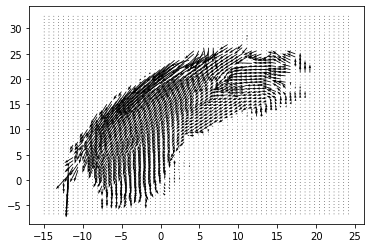

In [61]:
plt.quiver(x,y,u,v)

the following cell only explains what happened here: 

In [15]:
from locale import *
setlocale(LC_NUMERIC, '') # set to your default locale; for me this is
# 'English_Canada.1252'. Or you could explicitly specify a locale in which floats
# are formatted the way that you describe, if that's not how your locale works :)
atof('123,456') # 123456.0
# To demonstrate, let's explicitly try a locale in which the comma is a
# decimal point:
# setlocale(LC_NUMERIC, 'French_Canada.1252')
atof('123,456') # 123.456

123456.0

In [62]:
from pivpy import io, pivpy, graphics

In [72]:
rows = np.unique(y).shape[0]
cols = np.unique(x).shape[0]

In [73]:
x1 = x.reshape(rows,cols)
y1 = y.reshape(rows,cols)
u1 = u.reshape(rows,cols)
v1 = v.reshape(rows,cols)

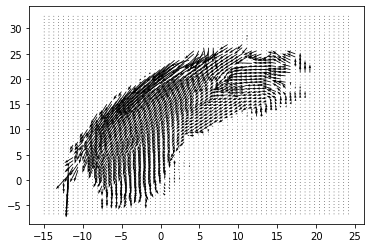

In [74]:
plt.quiver(x1,y1,u1,v1)

In [81]:
d = io.from_arrays(x1,y1,u1,v1,np.ones_like(u1))

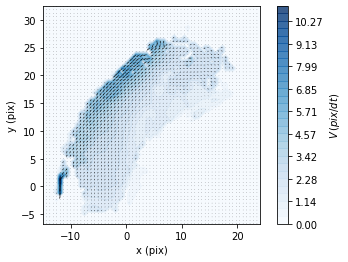

In [84]:
graphics.quiver(d.isel(t=0));